# Globsyn Summer School 2018, Machine Learning Using Python, a project on analysis of flipkart data, by Kaushik, Mukund, Rajdeep and Salini

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('flipkart_final_cleared.csv')
df.head()

,Unnamed: 0,product_name,product_category_tree,retail_price,discounted_price,is_FK_Advantage_product,product_rating,overall_rating,Brand_names,product_category,product_specs_refined
0,0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",999.0,379.0,False,5.0,3.0,Alisha,Clothing,"{""product_specification""=>[{""key""=>""Number of ..."
1,1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",32157.0,22646.0,False,2.0,5.0,FabHomeDecor,Furniture,"{""product_specification""=>[{""key""=>""Installati..."
2,2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",999.0,499.0,False,4.0,3.0,AW,Footwear,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",699.0,267.0,False,2.0,4.0,Alisha,Clothing,"{""product_specification""=>[{""key""=>""Number of ..."
4,4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",220.0,210.0,False,1.0,3.0,Sicons,Pet Supplies,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19441 entries, 0 to 19440
Data columns (total 11 columns):
Unnamed: 0                 19441 non-null int64
product_name               19441 non-null object
product_category_tree      19441 non-null object
retail_price               19441 non-null float64
discounted_price           19441 non-null float64
is_FK_Advantage_product    19441 non-null bool
product_rating             19441 non-null float64
overall_rating             19441 non-null float64
Brand_names                19441 non-null object
product_category           19441 non-null object
product_specs_refined      19441 non-null object
dtypes: bool(1), float64(4), int64(1), object(5)
memory usage: 1.1+ MB


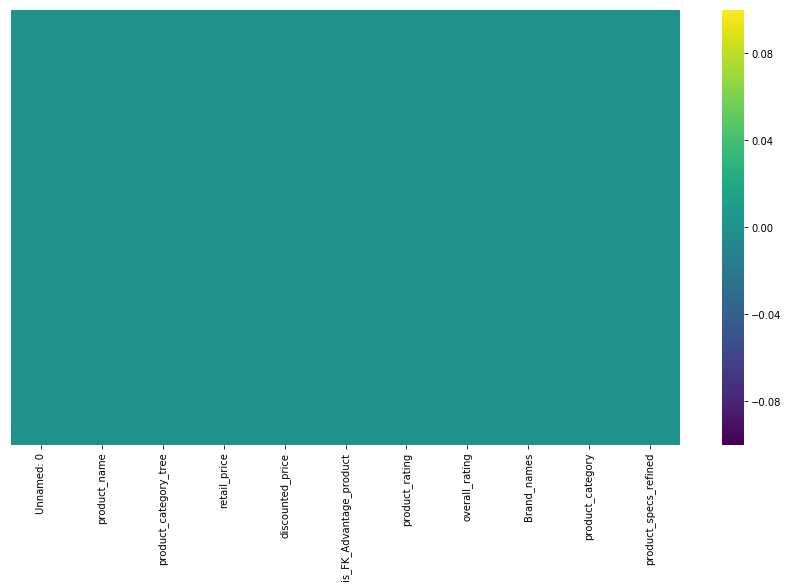

In [4]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [5]:
fk = pd.get_dummies(df["is_FK_Advantage_product"],drop_first = True)
df['is_FK_Advantage_product'] = fk
df.head()

,Unnamed: 0,product_name,product_category_tree,retail_price,discounted_price,is_FK_Advantage_product,product_rating,overall_rating,Brand_names,product_category,product_specs_refined
0,0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",999.0,379.0,0,5.0,3.0,Alisha,Clothing,"{""product_specification""=>[{""key""=>""Number of ..."
1,1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",32157.0,22646.0,0,2.0,5.0,FabHomeDecor,Furniture,"{""product_specification""=>[{""key""=>""Installati..."
2,2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",999.0,499.0,0,4.0,3.0,AW,Footwear,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",699.0,267.0,0,2.0,4.0,Alisha,Clothing,"{""product_specification""=>[{""key""=>""Number of ..."
4,4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",220.0,210.0,0,1.0,3.0,Sicons,Pet Supplies,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [6]:
df["discount_percent"] = ((df.retail_price - df.discounted_price)*100)/df.retail_price
df.head()

,Unnamed: 0,product_name,product_category_tree,retail_price,discounted_price,is_FK_Advantage_product,product_rating,overall_rating,Brand_names,product_category,product_specs_refined,discount_percent
0,0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",999.0,379.0,0,5.0,3.0,Alisha,Clothing,"{""product_specification""=>[{""key""=>""Number of ...",62.062062
1,1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",32157.0,22646.0,0,2.0,5.0,FabHomeDecor,Furniture,"{""product_specification""=>[{""key""=>""Installati...",29.576764
2,2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",999.0,499.0,0,4.0,3.0,AW,Footwear,"{""product_specification""=>[{""key""=>""Ideal For""...",50.050050
3,3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",699.0,267.0,0,2.0,4.0,Alisha,Clothing,"{""product_specification""=>[{""key""=>""Number of ...",61.802575
4,4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",220.0,210.0,0,1.0,3.0,Sicons,Pet Supplies,"{""product_specification""=>[{""key""=>""Pet Type"",...",4.545455


In [7]:
df[['product_name','Brand_names','retail_price','discounted_price','discount_percent']].head()

,product_name,Brand_names,retail_price,discounted_price,discount_percent
0,Alisha Solid Women's Cycling Shorts,Alisha,999.0,379.0,62.062062
1,FabHomeDecor Fabric Double Sofa Bed,FabHomeDecor,32157.0,22646.0,29.576764
2,AW Bellies,AW,999.0,499.0,50.050050
3,Alisha Solid Women's Cycling Shorts,Alisha,699.0,267.0,61.802575
4,Sicons All Purpose Arnica Dog Shampoo,Sicons,220.0,210.0,4.545455


In [8]:
df['together'] = df['product_category'] + df['Brand_names']

In [9]:
df.head(2)

,Unnamed: 0,product_name,product_category_tree,retail_price,discounted_price,is_FK_Advantage_product,product_rating,overall_rating,Brand_names,product_category,product_specs_refined,discount_percent,together
0,0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",999.0,379.0,0,5.0,3.0,Alisha,Clothing,"{""product_specification""=>[{""key""=>""Number of ...",62.062062,Clothing Alisha
1,1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",32157.0,22646.0,0,2.0,5.0,FabHomeDecor,Furniture,"{""product_specification""=>[{""key""=>""Installati...",29.576764,Furniture FabHomeDecor


In [10]:
number = LabelEncoder()

df['together'] = number.fit_transform(df['together'])

df['product_category'] = number.fit_transform(df['product_category'])

df['discount_percent'] = number.fit_transform(df['discount_percent'])

df['Brand_names'] = number.fit_transform(df['Brand_names'])


In [11]:
df.head(2)

,Unnamed: 0,product_name,product_category_tree,retail_price,discounted_price,is_FK_Advantage_product,product_rating,overall_rating,Brand_names,product_category,product_specs_refined,discount_percent,together
0,0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",999.0,379.0,0,5.0,3.0,219,43,"{""product_specification""=>[{""key""=>""Number of ...",4744,797
1,1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",32157.0,22646.0,0,2.0,5.0,1272,76,"{""product_specification""=>[{""key""=>""Installati...",1985,2941


In [12]:
X= np.array(df.iloc[:,8:10])
Y = np.array(df.iloc[:,11])

In [13]:
X

array([[ 219,   43],
       [1272,   76],
       [  93,   74],
       ...,
       [3461,   27],
       [4549,   74],
       [2144,   43]], dtype=int32)

In [14]:
features = X
target = Y

In [15]:
features_train, features_test, target_train, target_test = train_test_split(features,target,test_size = 0.33,random_state = 101)

# Naive-Bayes 

In [16]:
#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(features_train, target_train)

GaussianNB(priors=None)

In [17]:
predicted= model.predict([[1272,76]])
print(predicted)

[1985]


In [18]:
target_pred = model.predict(features_test)

In [19]:
accuracy_score(target_test, target_pred)

0.12889650872817954

# Linear Regression

In [20]:
lm = linear_model.LinearRegression()
model = lm.fit(features_train, target_train)

In [21]:
lm.score(features_test,target_test)

0.02382894936030766

In [22]:
lm.coef_

array([-0.00950612, -5.09897469])

In [23]:
lm.intercept_

3317.7544736250875

In [24]:
pd.DataFrame(['Category','Brand'], lm.coef_)

,0
-0.009506,Category
-5.098975,Brand


### There is a strong negative correlation between Brand and discount_percentage

In [25]:
target_pred = lm.predict(features_test)

In [26]:
import sklearn.metrics

In [27]:
#etrics.explained_variance_score(target_test,target_pred)

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
print("Mean squared error: %.2f"% mean_squared_error(target_test, target_pred))

Mean squared error: 3222767.00


In [30]:
print('Variance score: %.2f' % r2_score(target_test, target_pred))

Variance score: 0.02


Text(0.5,1,'Discount_percent vs Predicted Discount_percent: $Y_i$ vs $\\hat{Y}_i$')

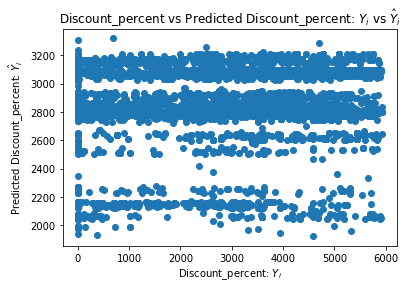

In [31]:
plt.scatter(target_test, target_pred)
plt.xlabel("Discount_percent: $Y_i$")
plt.ylabel("Predicted Discount_percent: $\hat{Y}_i$")
plt.title("Discount_percent vs Predicted Discount_percent: $Y_i$ vs $\hat{Y}_i$")

In [32]:
plt.close()
sns.set_style("whitegrid");
sns.pairplot(df,hue="product_rating",size=4);
plt.show()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
